# Compare Code Coverage (Figure 6)

In RQ3, we compare the branch coverage between DLLens and existing approaches (including TitanFuzz, ACETest, DeepREL, DocTer, and FreeFuzz) on 200 randomly sampled APIs.

We release the signatures of our sampled APIs at `./data/working_dir/rq3/tf_100.txt` and `./data/working_dir/rq3/torch_100.txt`

We provide the coverage trend at `./data/working_dir/rq3/coverage`.

You can draw the coverage trend by running the following code block

===== Report Tool Coverage =====


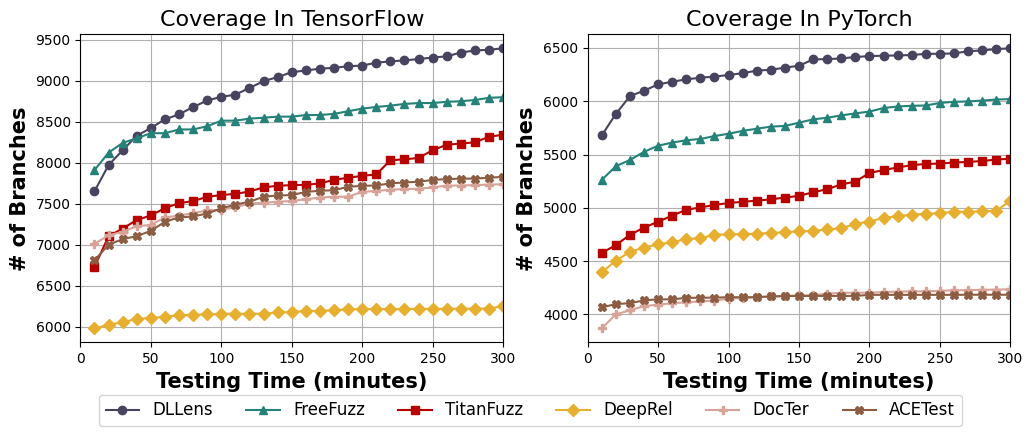

In [1]:
from toolbox import load_tool_cov
import matplotlib.pyplot as plt
import numpy as np

print("===== Report Tool Coverage =====")
tool_list = ["DLLens", "FreeFuzz", "TitanFuzz", "DeepRel", "DocTer", "ACETest"]
coverage_res = {}
for tool_name in tool_list:
    coverage_res[tool_name] = load_tool_cov(f"data/working_dir/rq3/coverage/{tool_name.lower()}.txt")
tool_color = ['#48445F','#258279','#B80200',"#E7AF30", "#D8A398", "#8C5D42"]
marker_list = ["o", "^", "s", "D", "P", "X"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.xlim(0, 300)
num_x = len(coverage_res["DLLens"]["tensorflow"])
x = np.linspace(300//num_x, 300, num_x)
ax1.set_title("Coverage In TensorFlow", fontsize=16)
ax1.tick_params(axis='x')
ax1.set_ylabel('# of Branches', fontsize=15, fontweight='bold')
ax1.set_xlabel('Testing Time (minutes)', fontsize=15, fontweight='bold')
ax1.set_xlim(0, 300)
i = 0
for tool_name in tool_list:
    ax1.plot(x, coverage_res[tool_name]["tensorflow"], label=tool_name, color=tool_color[i], linestyle="-", marker=marker_list[i])
    i += 1
ax1.grid()

ax2.set_title("Coverage In PyTorch", fontsize=16)
ax2.tick_params(axis='x')
ax2.set_ylabel('# of Branches', fontsize=15, fontweight='bold')
ax2.set_xlabel('Testing Time (minutes)', fontsize=15, fontweight='bold')
ax2.set_xlim(0, 300)
i = 0
for tool_name in tool_list:
    ax2.plot(x, coverage_res[tool_name]["pytorch"], label=tool_name, color=tool_color[i], linestyle="-", marker=marker_list[i])
    i += 1
ax2.grid()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.00), ncol=len(labels), fontsize=12)

plt.savefig("figures/rq4_coverage_trend.pdf", format='pdf', bbox_inches='tight')

# Comparison on Bug Detection

We release the bugs detected by each tool in RQ3 at `./data/working_dir/rq3/bugs`